## Keras mnist With CNN

这次，我们将在Keras下利用卷积神经网络(CNN)对mnist进行训练和预测

+ 关于卷积神经网络，强烈推荐[零基础入门深度学习(4) - 卷积神经网络](https://www.zybuluo.com/hanbingtao/note/485480)，有详细解释和公式推导以及代码实现
+ Keras中CNN的使用方法，推荐[deep-learning-keras-tensorflow
](https://github.com/leriomaggio/deep-learning-keras-tensorflow/tree/master/4.%20Convolutional%20Neural%20Networks)

OK，废话不多说，让我们开始吧

In [30]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt

## 数据准备

导入数据

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

观察数据。训练数据共60000个，测试数据10000个，每个样本都是28*28的图像

In [11]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


展示数据

In [14]:
%matplotlib inline
def plot_sample(X):
    plt.figure()
    plt.imshow(X, cmap='gray')

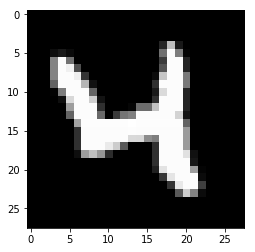

In [18]:
plot_sample(x_train[20])

### 注意！下面的内容非常重要
在图像的表示上，Theano和TensorFlow发生了分歧。Theano将100张大小为16*32的RGB图像，表示为$(100,3,16,32)$，Caffe也是这种方式，第0维表示样数量，第1维表示通道数量，后面两个是高和宽，这样的表示方法我们成为"channels_first"。而TensorFlow是这么表示的 $(100,16,32,3)$，把通道数放在了最后，这种方式成为"channles_last"。详见[一些基本概念](https://keras-cn.readthedocs.io/en/latest/for_beginners/concepts/)data_format部分。
那我们在数据准备阶段就要将数据转换成相应的格式

In [19]:
from keras import backend as K

In [20]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:
    shape_ord = (img_rows, img_cols, 1)

### 预处理

In [21]:
def preprocess_data(X):
    return X/255

In [22]:
x_train = x_train.reshape((x_train.shape[0],)+shape_ord)
x_test = x_test.reshape((x_test.shape[0],)+shape_ord)

x_train = x_train.astype('float')
x_test = x_test.astype('float')

x_train = preprocess_data(x_train)
x_test = preprocess_data(x_test)

### One-hoe 编码

In [24]:
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [25]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


## 搭起我们的网络来

设置参数

In [28]:
kernel_size = (3,3)
pool_size = (2,2)
epochs = 3
batch_size = 128
nb_filters = 32

设置网络结构

In [35]:
def build_model():
    model = Sequential()
    
    model.add(Conv2D(nb_filters, kernel_size=kernel_size, input_shape=shape_ord))
    model.add(Activation('relu'))
    
    model.add(Conv2D(nb_filters//2, kernel_size=kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    
    return model

编译和训练

In [36]:
model = build_model()

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/3
57000/57000 [==============================] - 86s 2ms/step - loss: 0.3246 - acc: 0.9001 - val_loss: 0.0599 - val_acc: 0.9843
Epoch 2/3
57000/57000 [==============================] - 84s 1ms/step - loss: 0.1161 - acc: 0.9649 - val_loss: 0.0461 - val_acc: 0.9887
Epoch 3/3
57000/57000 [==============================] - 87s 2ms/step - loss: 0.0865 - acc: 0.9737 - val_loss: 0.0408 - val_acc: 0.9897


测试结果

In [39]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Loss :', loss)
print('Accuracy :', acc)

Loss : 0.0391287969164
Accuracy : 0.9874


显示预测结果

In [45]:
x_test_org = x_test.reshape(x_test.shape[0], img_rows, img_cols) #为了显示图像而进行reshape

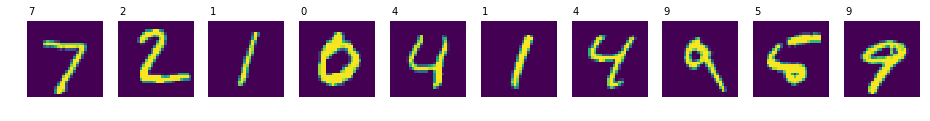

In [52]:
nb_predict = 10
x_pred = x_test[:nb_predict]
prediction = model.predict(x_pred)
prediction = prediction.argmax(axis=1)

plt.figure(figsize=(16,8))
for i in range(nb_predict):
    plt.subplot(1, nb_predict, i+1)
    plt.imshow(x_test_org[i])
    plt.text(0,-3,prediction[i], color='black')
    plt.axis('off')

噢耶！一个简单CNN网络就能有98%以上的准确率，CNN真棒。好的，以上就是Keras中如何使用卷积神经网络。